# Fundamentals of Computer Science - PERCEPTUAL BISTABILITY

In [3]:
#Import all the required modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Exercise 1
#### In this exercise we will explore a model of binocular rivalry presented by Laing and Chow (2002).While their paper included a spiking network model, we will concern ourselves only with their reduced population rate model.

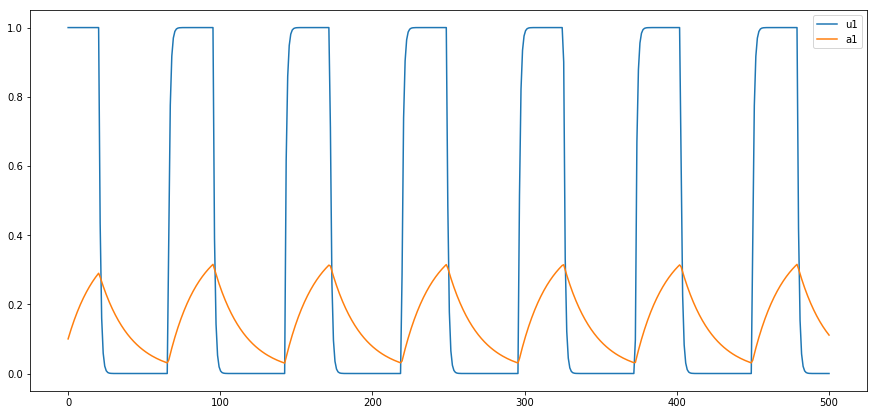

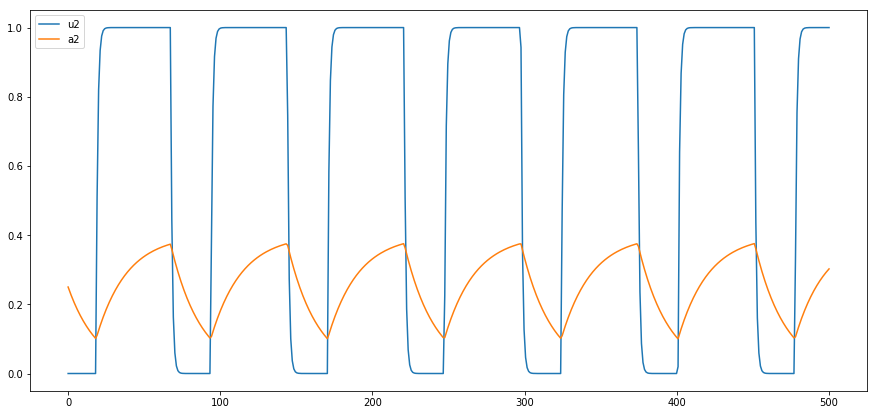

In [131]:
#OPTION ONE 
u1 = 1; a1 = 0.1; u2 = 0; a2 = 0.25
t = np.linspace(0,500,num=500)
x_0 = [u1, a1, u2, a2]; # initial conditions
I1 = 0.43; I2 = 0.5;
I = (I1,I2)

def  laing_chow (val, t, I1, I2) :
    alpha = 0.2 ; beta = 0.4; phi = 0.4; tau = 20 ; g1 = 1; g2 = 1;
    u1,a1,u2,a2 = val
    du1dt = - u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0 )
    du2dt = - u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0)  
    da1dt = (1/tau)* (-a1 + phi*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0))
    da2dt = (1/tau)* (-a2 + phi*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0))
    y = [du1dt , da1dt, du2dt, da2dt]
    #It is very important to keep the order of the equations with the initial values for each one
    return y

sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol [:,0]; a1 = sol [:,1]; u2 = sol [:,2]; a2 = sol [:,3]

plt.figure(figsize=(15,7))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.legend()
plt.figure(figsize=(15,7))
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

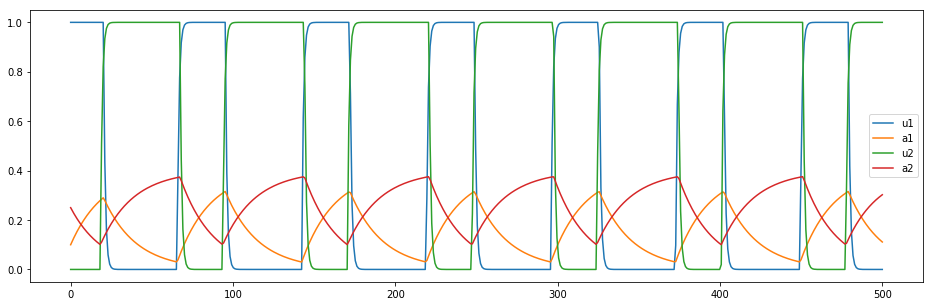

In [49]:
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

In [138]:
#Population active if u1 > u2
x1 = u1 > u2; #p1 is active when x1 = 1
x2 = u2 > u1; #p2 is active when x2 = 1
def dominance_durations(x1,x2,t) :
    #Calculate the time at which each population is active during each interval
    D=[];D2=[];D1=[];
    t1=t[0];
    t = t[:-2]
    for i,t_ in enumerate (t):
        if  (x1[i+1]^x1[i]) :
            t2 = t_;
            D.append(t2-t1);
            t1 = t2;       
            D1 = D[0:-1:2]; D2 =D[1:-1:2];
            if x1[0]== 0: #just to know which is each population 
                D1,D2=D2,D1;
    return D1,D2

D1,D2 = dominance_durations(x1,x2,t)
D1, D2


([20.040080160320638,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896],
 [47.09418837675349,
  48.09619238476954,
  49.09819639278555,
  49.09819639278558,
  48.09619238476955,
  49.09819639278555])

#### Why are the durations different from the analytical T1 (eq.9) in the paper?

In [142]:
#Anal. solution for T1
alpha = 0.2 ; beta = 0.4; phi = 0.4; tau = 20 ;
T1 = -tau*np.log((I2-beta)/(beta+phi-I1))
T2= -tau*np.log((I1-beta)/(beta+phi-I2))
T2

print('They are similar but not exactly equal because we are solving the equations numerically so we have some error')
print(T1, T2)


They are similar but not exactly equal because we are solving the equations numerically so we have some error
26.16665639300358 46.051701859880936


#### The paper states that, if the inputs are larger than −alpha +beta +phi, both populations become active and oscillation will stop. Can you confirm this? 


 Using the previous values, alpha = 0.2, beta = 0.4 and phi = 0.4, the inputs should be higher than 0.6. 

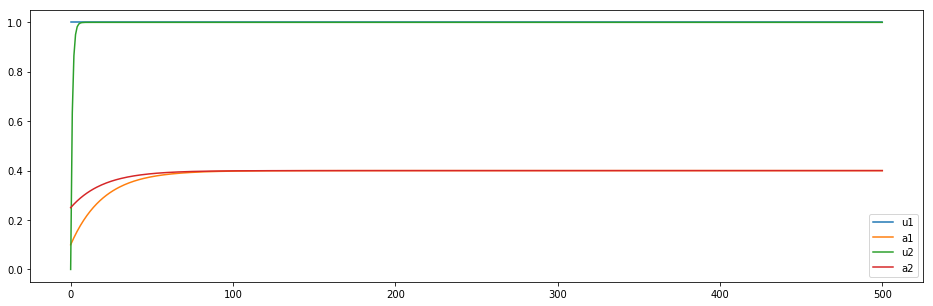

In [146]:
I1 = 0.64; I2 = 0.75; #Any value above 0.6 should work for this prove
I = (I1,I2)
sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol [:,0]; a1 = sol [:,1]; u2 = sol [:,2]; a2 = sol [:,3]
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

#### What about intermediate input values? Do the analytical dominance periods still fit the experimental results? How do you interpret these results?

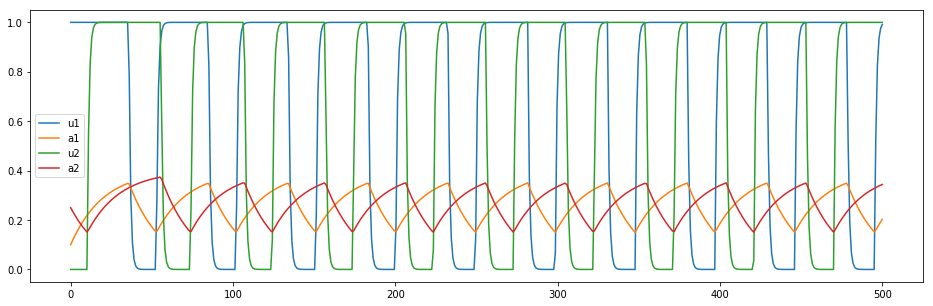

In [152]:
I1 = 0.55; I2 = 0.55; #Any value above 0.6 should work for this prove
I = (I1,I2)
sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol [:,0]; a1 = sol [:,1]; u2 = sol [:,2]; a2 = sol [:,3]
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

If we use intermediate values too close to 0.6, although without reaching it, both populations oscillate but the time intervals are overlapped, i.e. there will be time points with both stimulus in 1 (both populations active) 

## Exercise 2
#### Next we will investigate a model of perceptual bistability developed by Moreno-Bote et al. (2007).The model is an attractor network that relies on noise to drive transitions between network states. Once again, while they also present a spiking network model, we will consider only their meanfield firing rate model.

#### 1. Why can’t you use scipy.integrate.odeint to implement the model in Moreno-Bote et al. (2007)?

    We cannot use odeint because in this case we don't have an ordinary differential equation but a stochastic 
    differential equation, i.e. it contais a random variable (f.e. white noise).

In [1]:
#Implement Euler-Maruyama method.
def euler_maruyama(ffun, gfun, x0, t, args) :
    X[0] = x0
    dt = 0.1;
    X.append = X[-1] + ffun(X[-1])*dt + gfun(X[-1])*np.sqrt(dt)*Wt
    